**Question 9 -***

Write a program to read the data from the following link, perform data analysis and answer the following
questions
**Note -**

1. Write code comments wherever required for code understanding

**Link -** https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
    
**Insights to be drawn -**

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after
2015

● Draw plots to show the distribution between city and electric vehicle type

In [2]:
pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

Cars and Types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []

TESLA cars with Model Year and Model Type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []

Cars with an electric range > 100 and made after 2015:
        VIN (1-10)    County           City State  Postal Code  Model Year  \
0       5YJXCAE26J    Yakima         Yakima    WA      98908.0        2018   
2       5YJ3E1EB0K      King        Seattle    WA      98199.0        2019   
4       5YJSA1E21H  Thurston          Lacey    WA      98516.0        2017   
12      5YJ3E1EC7L  Thurston      

<Figure size 864x432 with 0 Axes>

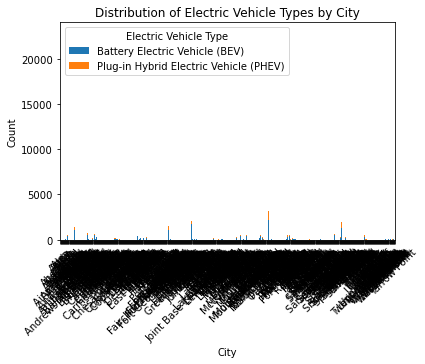

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Check the column names in the dataset
print(df.columns)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_fuel_cars = df.loc[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Yes', ['Make', 'Model']]
print("\nCars and Types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_fuel_cars)

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars_bothell = df.loc[(df['Make'] == 'TESLA') & (df['City'] == 'BOTHELL'), ['Model Year', 'Model']]
print("\nTESLA cars with Model Year and Model Type made in Bothell City:")
print(tesla_cars_bothell)

# Get all the cars that have an electric range of more than 100, and were made after 2015
electric_cars_gt_100_range = df.loc[(df['Electric Range'] > 100) & (df['Model Year'] > 2015), :]
print("\nCars with an electric range > 100 and made after 2015:")
print(electric_cars_gt_100_range)

# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(12, 6))
df.groupby(['City', 'Electric Vehicle Type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Electric Vehicle Types by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.show()

